In [561]:
import os
import pandas as pd

Training image paths and labels

In [562]:
#csv files path
path = './data'
train_image_paths_csv = 'train_image_paths.csv'
test_image_paths_csv = 'test_image_paths.csv'

In [563]:
train_image_paths = pd.read_csv(os.path.join(path,train_image_paths_csv),dtype=str,header=None)
train_image_paths.columns = ['image_path']
train_image_paths.head()

,image_path
0,data/train/XR_WRIST/patient06359/study1_positi...
1,data/train/XR_WRIST/patient06359/study1_positi...
2,data/train/XR_WRIST/patient06360/study1_positi...
3,data/train/XR_WRIST/patient06360/study1_positi...
4,data/train/XR_WRIST/patient06360/study1_positi...


In [564]:
test_image_paths = pd.read_csv(os.path.join(path,test_image_paths_csv),dtype=str,header=None)
test_image_paths.columns = ['image_path']
test_image_paths.head()

,image_path
0,data/test/XR_WRIST/patient11185/study1_positiv...
1,data/test/XR_WRIST/patient11185/study1_positiv...
2,data/test/XR_WRIST/patient11185/study1_positiv...
3,data/test/XR_WRIST/patient11185/study1_positiv...
4,data/test/XR_WRIST/patient11186/study1_positiv...


In [565]:
train_image_paths['label'] = train_image_paths['image_path'].map(lambda x:1 if 'positive' in x else 0)
train_image_paths['patient_id']  = train_image_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient',''))
train_image_paths.head()

,image_path,label,patient_id
0,data/train/XR_WRIST/patient06359/study1_positi...,1,06359
1,data/train/XR_WRIST/patient06359/study1_positi...,1,06359
2,data/train/XR_WRIST/patient06360/study1_positi...,1,06360
3,data/train/XR_WRIST/patient06360/study1_positi...,1,06360
4,data/train/XR_WRIST/patient06360/study1_positi...,1,06360


In [566]:
test_image_paths['label'] = test_image_paths['image_path'].map(lambda x:1 if 'positive' in x else 0)
test_image_paths['patient_id']  = test_image_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient',''))
test_image_paths.head()

,image_path,label,patient_id
0,data/test/XR_WRIST/patient11185/study1_positiv...,1,11185
1,data/test/XR_WRIST/patient11185/study1_positiv...,1,11185
2,data/test/XR_WRIST/patient11185/study1_positiv...,1,11185
3,data/test/XR_WRIST/patient11185/study1_positiv...,1,11185
4,data/test/XR_WRIST/patient11186/study1_positiv...,1,11186


In [567]:
print(train_image_paths['image_path'].size)
print(test_image_paths['image_path'].size)

9752
659


https://www.kaggle.com/code/pratinavseth/mura-classification-ensemble

In [568]:
train_image_paths.columns

Index(['image_path', 'label', 'patient_id'], dtype='object')

Text(0.5, 1.0, 'Negative Test')

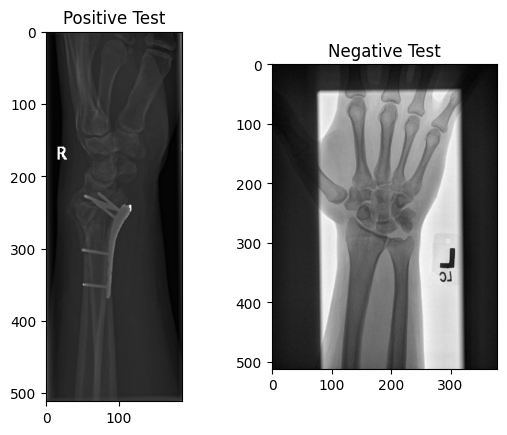

In [569]:
import matplotlib.pyplot as plt

img1 = plt.imread(train_image_paths['image_path'][0])
img2 = plt.imread(train_image_paths['image_path'][147])


figure = plt.figure()
figure.add_subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title("Positive Test")

figure.add_subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title("Negative Test")

In [570]:
# shuffling the data frame
# https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows

train_image_paths = train_image_paths.sample(frac=1).reset_index(drop=True)
test_data = test_image_paths.sample(frac=1).reset_index(drop=True)

In [571]:
train_data = train_image_paths[0:8710]
train_image_paths = train_image_paths[8710:]

valid_data = train_image_paths[0:1042]
train_image_paths = train_image_paths[1042:]

In [572]:
print(len(train_data))
print(len(valid_data))

8710
1042


In [573]:
valid_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [575]:
pos_train_count = 0
for i in range(1, len(train_data)):
    if train_data['label'][i] == 1:
        pos_train_count += 1


pos_valid_count = 0
pos_test_count = 0
for i in range(len(valid_data)):
    if valid_data['label'][i] == 1:
        pos_valid_count += 1

for i in range(len(test_data)):
    if test_data['label'][i] == 1:
        pos_test_count +=1


In [576]:
total_images = len(train_data) + len(valid_data) + len(test_data)
print("Total number of images: ", total_images, '\n')

print("Train image split: ", round(100 * len(train_data) / total_images), "%")
print("Percentage of positive labels", round(100 * pos_train_count / len(train_data)), "%\n")

print("Validation image split: ", round(100 * len(valid_data) / total_images), "%") 
print("Percentage of positive labels", round(100 * pos_valid_count / len(valid_data)), "%\n")

print("Test image split: ", round(100 * len(test_data) / total_images), "%") 
print("Percentage of positive labels", round(100 * pos_test_count / len(test_data)), "%")

Total number of images:  10411 

Train image split:  84 %
Percentage of positive labels 41 %

Validation image split:  10 %
Percentage of positive labels 39 %

Test image split:  6 %
Percentage of positive labels 45 %


We can see that the data is well split, with 80% of data for training, 10% for validation, and 10% for testing. Within these groups the data is also reasonably balanced (the percentage of positive labels is relatively close to 50%, and there is not significant difference in the amount of positives that each set has).

In [577]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=(1./255),
    samplewise_center = True,
    samplewise_std_normalization = True,
    rotation_range = 5, 
    width_shift_range = 0.1, 
    height_shift_range = 0.1,
    zoom_range = 0.1, 
    horizontal_flip = True,
    vertical_flip = True
    )
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data, 
    x_col='image_path', 
    y_col='label',
    target_size=(128, 128), 
    batch_size=64,
    label_mode='int', 
    shuffle=False, 
    class_mode='other',
    color_mode = 'grayscale')


valid_datagen = ImageDataGenerator(rescale=(1./255),
    samplewise_center = True,
    samplewise_std_normalization = True,
    rotation_range = 0, 
    width_shift_range = 0., 
    height_shift_range = 0.,
    zoom_range = 0.0, 
    horizontal_flip = False,
    vertical_flip = False
    )
valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_data, 
    x_col='image_path', 
    y_col='label',
    target_size=(128, 128), 
    batch_size=64,
    label_mode='int', 
    shuffle=False, 
    class_mode='other',
    color_mode = 'grayscale'   
)


Found 8710 validated image filenames.
Found 1042 validated image filenames.


In [578]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 128, 128, 1)
labels batch shape: (64,)


In [601]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dropout(0.05))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
            optimizer='nadam', 
            metrics=['acc'])


In [602]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 128)     

In [603]:
history = model.fit(
    train_generator,
    steps_per_epoch=136, # 8327 (number of images) / 64 (batch size) = 130
    epochs=30,
    validation_data=valid_generator,
    validation_steps=16 # 1042 (number of images) / 64 (batch size) = 16
)

Epoch 1/30
136/136 [==============================] - 27s 189ms/step - loss: 0.6649 - acc: 0.6129 - val_loss: 0.6533 - val_acc: 0.6279
Epoch 2/30
136/136 [==============================] - 25s 187ms/step - loss: 0.6496 - acc: 0.6258 - val_loss: 0.6390 - val_acc: 0.6533
Epoch 3/30
136/136 [==============================] - 26s 190ms/step - loss: 0.6213 - acc: 0.6529 - val_loss: 0.6050 - val_acc: 0.6699
Epoch 4/30
136/136 [==============================] - 25s 182ms/step - loss: 0.5819 - acc: 0.6963 - val_loss: 0.5508 - val_acc: 0.7051
Epoch 5/30
136/136 [==============================] - 25s 182ms/step - loss: 0.5406 - acc: 0.7334 - val_loss: 0.5003 - val_acc: 0.7568
Epoch 6/30
136/136 [==============================] - 25s 182ms/step - loss: 0.5222 - acc: 0.7450 - val_loss: 0.4987 - val_acc: 0.7695
Epoch 7/30
136/136 [==============================] - 25s 182ms/step - loss: 0.5109 - acc: 0.7550 - val_loss: 0.5004 - val_acc: 0.7568
Epoch 8/30
136/136 [==============================] - 2

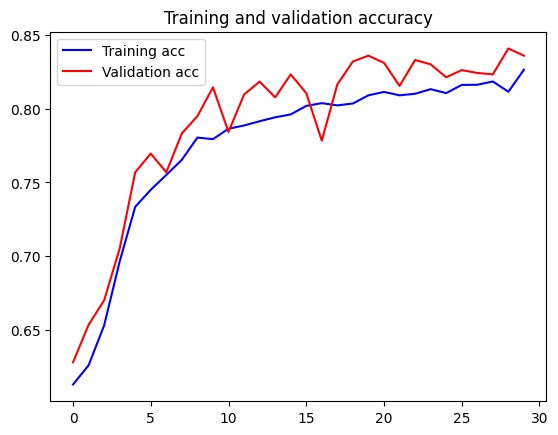

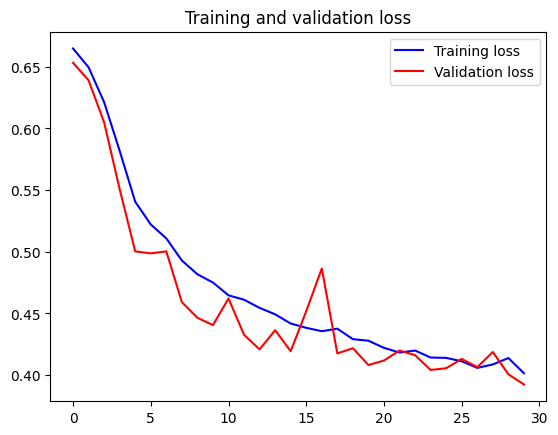

In [604]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [605]:
test_datagen = ImageDataGenerator(rescale=1./255,
    samplewise_center = True,
    samplewise_std_normalization = True,
    rotation_range = 0, 
    width_shift_range = 0., 
    height_shift_range = 0.,
    zoom_range = 0.0, 
    horizontal_flip = False,
    vertical_flip = False)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data, 
    x_col='image_path', 
    y_col='label',
    target_size=(128, 128), 
    batch_size=659,
    label_mode='int', 
    class_mode='other',
    color_mode = 'grayscale',
    shuffle=False    
)

Found 659 validated image filenames.


In [606]:
model.evaluate(test_generator, steps=1)

1/1 [==============================] - 1s 1s/step - loss: 0.4577 - acc: 0.8027


[0.45769569277763367, 0.8027313947677612]

In [614]:
model.save('MURA_model.h5')

In [636]:
from keras import models

loaded_model = models.load_model('MURA_model.h5')

In [637]:
patient_path = './MURA-v1.1/'
patient_image_paths_csv = 'valid_image_paths.csv'

In [638]:
patient_image_paths = pd.read_csv(os.path.join(patient_path,patient_image_paths_csv),dtype=str,header=None)
patient_image_paths.columns = ['image_path']
patient_image_paths.head()

,image_path
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...


In [639]:
print(patient_image_paths.loc[0])

image_path    MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
Name: 0, dtype: object


In [640]:
patient_image_paths['label'] = patient_image_paths['image_path'].map(lambda x:1 if 'positive' in x else 0)
patient_image_paths['patient_id']  = patient_image_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient','') + '_study' + x.split('/')[4][5:6])
patient_image_paths.head()

,image_path,label,patient_id
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,11185_study1
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,11185_study1
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,11185_study1
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,11185_study1
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1,11186_study1


In [642]:
patient_test_datagen = ImageDataGenerator(rescale=1./255,
    samplewise_center = True,
    samplewise_std_normalization = True,
    rotation_range = 0, 
    width_shift_range = 0., 
    height_shift_range = 0.,
    zoom_range = 0.0, 
    horizontal_flip = False,
    vertical_flip = False)
patient_test_generator = patient_test_datagen.flow_from_dataframe(
    dataframe=patient_image_paths, 
    x_col='image_path', 
    y_col='label',
    target_size=(128, 128), 
    batch_size=799,
    label_mode='int', 
    class_mode='other',
    color_mode = 'grayscale',
    shuffle=False    
)

Found 3197 validated image filenames.


In [643]:
loaded_model.evaluate(patient_test_generator, steps=4)

4/4 [==============================] - 6s 2s/step - loss: 0.7044 - acc: 0.6452


[0.7044167518615723, 0.6451814770698547]

In [704]:
all_path = './MURA-v1.1/'
all_train_image_paths_csv = 'train_image_paths.csv'
all_image_paths = pd.read_csv(os.path.join(all_path, all_train_image_paths_csv),dtype=str,header=None)
all_image_paths.columns = ['image_path']
all_image_paths.head()

,image_path
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


In [705]:
all_image_paths['label'] = all_image_paths['image_path'].map(lambda x:1 if 'positive' in x else 0)
all_image_paths['patient_id']  = all_image_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient','') + '_study' + x.split('/')[4][5:6])
all_image_paths.head()

,image_path,label,patient_id
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1,00001_study1
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1,00001_study1
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1,00001_study1
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1,00002_study1
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1,00002_study1


In [706]:
all_image_paths = all_image_paths.sample(frac=1).reset_index(drop=True)

In [707]:
all_train_data = all_image_paths[0:8710]
all_image_paths = all_image_paths[8710:]

all_valid_data = all_image_paths[0:1042]
all_image_paths = all_image_paths[1042:]

In [708]:
all_train_datagen = ImageDataGenerator(rescale=(1./255),
    samplewise_center = True,
    samplewise_std_normalization = True,
    rotation_range = 5, 
    width_shift_range = 0.1, 
    height_shift_range = 0.1,
    zoom_range = 0.1, 
    horizontal_flip = True,
    vertical_flip = True
    )

all_train_generator = all_train_datagen.flow_from_dataframe(
    dataframe=all_train_data, 
    x_col='image_path', 
    y_col='label',
    target_size=(128, 128), 
    batch_size=64,
    label_mode='int', 
    shuffle=False, 
    class_mode='other',
    color_mode = 'grayscale')

all_valid_datagen = ImageDataGenerator(rescale=(1./255),
    samplewise_center = True,
    samplewise_std_normalization = True,
    rotation_range = 0, 
    width_shift_range = 0., 
    height_shift_range = 0.,
    zoom_range = 0.0, 
    horizontal_flip = False,
    vertical_flip = False
    )
all_valid_generator = all_valid_datagen.flow_from_dataframe(
    dataframe=all_valid_data, 
    x_col='image_path', 
    y_col='label',
    target_size=(128, 128), 
    batch_size=64,
    label_mode='int', 
    shuffle=False, 
    class_mode='other',
    color_mode = 'grayscale'   
)

Found 8710 validated image filenames.
Found 1042 validated image filenames.


In [711]:
from keras import layers
from keras import models

all_model = models.Sequential()
all_model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(128, 128, 1)))
all_model.add(layers.MaxPooling2D((2, 2)))
all_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
all_model.add(layers.MaxPooling2D((2, 2)))
all_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
all_model.add(layers.MaxPooling2D((2, 2)))
all_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
all_model.add(layers.MaxPooling2D((2, 2)))
all_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
all_model.add(layers.MaxPooling2D((2, 2)))
all_model.add(layers.Flatten())

all_model.add(layers.Dropout(0.05))
all_model.add(layers.Dense(512, activation='relu'))
all_model.add(layers.Dense(1, activation='sigmoid'))
all_model.compile(loss='binary_crossentropy',
            optimizer='nadam', 
            metrics=['acc'])


In [712]:
history_two = all_model.fit(
    all_train_generator,
    steps_per_epoch=125,
    epochs=30,
    validation_data=all_valid_generator,
    validation_steps=16
)

Epoch 1/30
125/125 [==============================] - 34s 260ms/step - loss: 0.6715 - acc: 0.5938 - val_loss: 0.7727 - val_acc: 0.5781
Epoch 2/30
125/125 [==============================] - 26s 207ms/step - loss: 0.6592 - acc: 0.6126 - val_loss: 0.6505 - val_acc: 0.6201
Epoch 3/30
125/125 [==============================] - 25s 200ms/step - loss: 0.6492 - acc: 0.6234 - val_loss: 0.6402 - val_acc: 0.6162
Epoch 4/30
125/125 [==============================] - 24s 192ms/step - loss: 0.6339 - acc: 0.6466 - val_loss: 0.6254 - val_acc: 0.6416
Epoch 5/30
125/125 [==============================] - 25s 197ms/step - loss: 0.6253 - acc: 0.6536 - val_loss: 0.6205 - val_acc: 0.6484
Epoch 6/30
125/125 [==============================] - 24s 192ms/step - loss: 0.6090 - acc: 0.6631 - val_loss: 0.6391 - val_acc: 0.6621
Epoch 7/30
125/125 [==============================] - 24s 191ms/step - loss: 0.5929 - acc: 0.6799 - val_loss: 0.5877 - val_acc: 0.6836
Epoch 8/30
125/125 [==============================] - 2

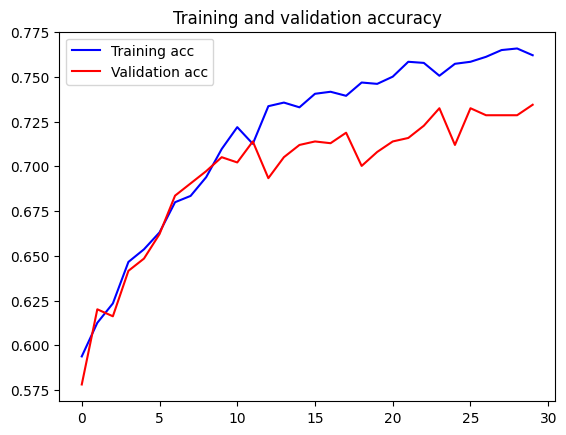

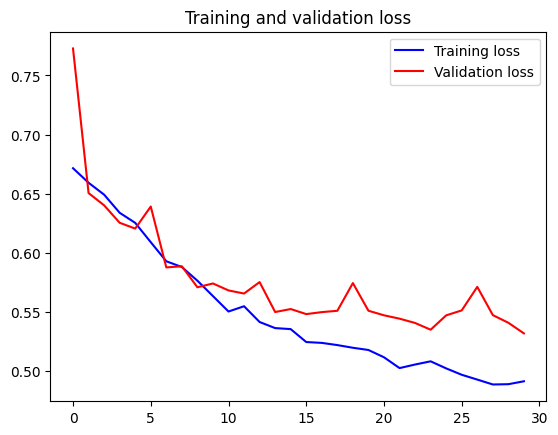

In [713]:
import matplotlib.pyplot as plt
acc = history_two.history['acc']
val_acc = history_two.history['val_acc']
loss = history_two.history['loss']
val_loss = history_two.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [714]:
all_model.evaluate(patient_test_generator, steps=4)

4/4 [==============================] - 6s 2s/step - loss: 0.5618 - acc: 0.7234


[0.5618201494216919, 0.7234042286872864]